# **Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

**Pre-processing**

A bit of exploration

In [3]:
data=pd.read_csv("/content/drive/MyDrive/chronickidneydisease.csv")

In [4]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,...,39,7800,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,6,68.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,...,36,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,7,24.0,NaN,1.015,2.0,4.0,0.0,1.0,0.0,0.0,...,44,6900,5,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,...,33,9600,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [5]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
for i in data.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan  0.  1.]
unique values in "pc":
 [ 0.  1. nan]
unique values in "pcc":
 [ 0.  1. nan]
unique values in "ba":
 [ 0.  1. nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 15

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [10]:
data.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,...,313.000000,312.000000,348.000000,398.000000,392.000000,396.000000,399.000000,399.000000,399.000000,398.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,...,137.528754,4.627244,12.526437,0.369347,0.341837,0.085859,0.794486,0.190476,0.150376,0.623116
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,...,10.408752,3.193904,2.912587,0.483235,0.474931,0.280510,0.404584,0.393170,0.357888,0.485216
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,135.000000,3.800000,10.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,138.000000,4.400000,12.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,142.000000,4.900000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,163.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Data Cleaning**

In [11]:
for i in range(data.shape[0]):
    if data.iloc[i,25]=='ckd\t':
        data.iloc[i,25]='ckd'
    if data.iloc[i,20] in [' yes','\tyes']:
        data.iloc[i,20]='yes'
    if data.iloc[i,20]=='\tno':
        data.iloc[i,20]='no'
    if data.iloc[i,21]=='\tno':
        data.iloc[i,21]='no'
    if data.iloc[i,16]=='\t?':
        data.iloc[i,16]=np.nan
    if data.iloc[i,16]=='\t43':
        data.iloc[i,16]='43'
    if data.iloc[i,17]=='\t?':
        data.iloc[i,17]=np.nan
    if data.iloc[i,17]=='\t6200':
      data.iloc[i,17]= '6200'
    if data.iloc[i,17]=='\t8400':
        data.iloc[i,17]= '6200'
    if data.iloc[i,18]=='\t?':
        data.iloc[i,18]=np.nan
    if data.iloc[i,25]=='ckd':
        data.iloc[i,25]='yes'
    if data.iloc[i,25]=='notckd':
        data.iloc[i,25]='no'

In [12]:
data.drop('id',axis=1,inplace=True)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=feature_names

In [14]:
for i in data.columns:
    print("unique values in {}:\n".format(i),data[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan  0.  1.]
unique values in Pus Cells:
 [ 0.  1. nan]
unique values in Pus Cell Clumps:
 [ 0.  1. nan]
unique values in Bacteria:
 [ 0.  1. nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159

In [15]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [16]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [17]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    float64
 6   Pus Cells                       335 non-null    float64
 7   Pus Cell Clumps                 396 non-null    float64
 8   Bacteria                        396 non-null    float64
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [25]:
categoricals=[]
for col in data.columns:
    if not col in numeric:
        categoricals.append(col)
        categoricals.remove('/content/drive/MyDrive/chronickidneydisease.csv')

In [26]:
categoricals

[]

# **Further Exploration**

In [ ]:
import matplotlib.style as style
style.use('fivethirtyeight')

IndexError: ignored

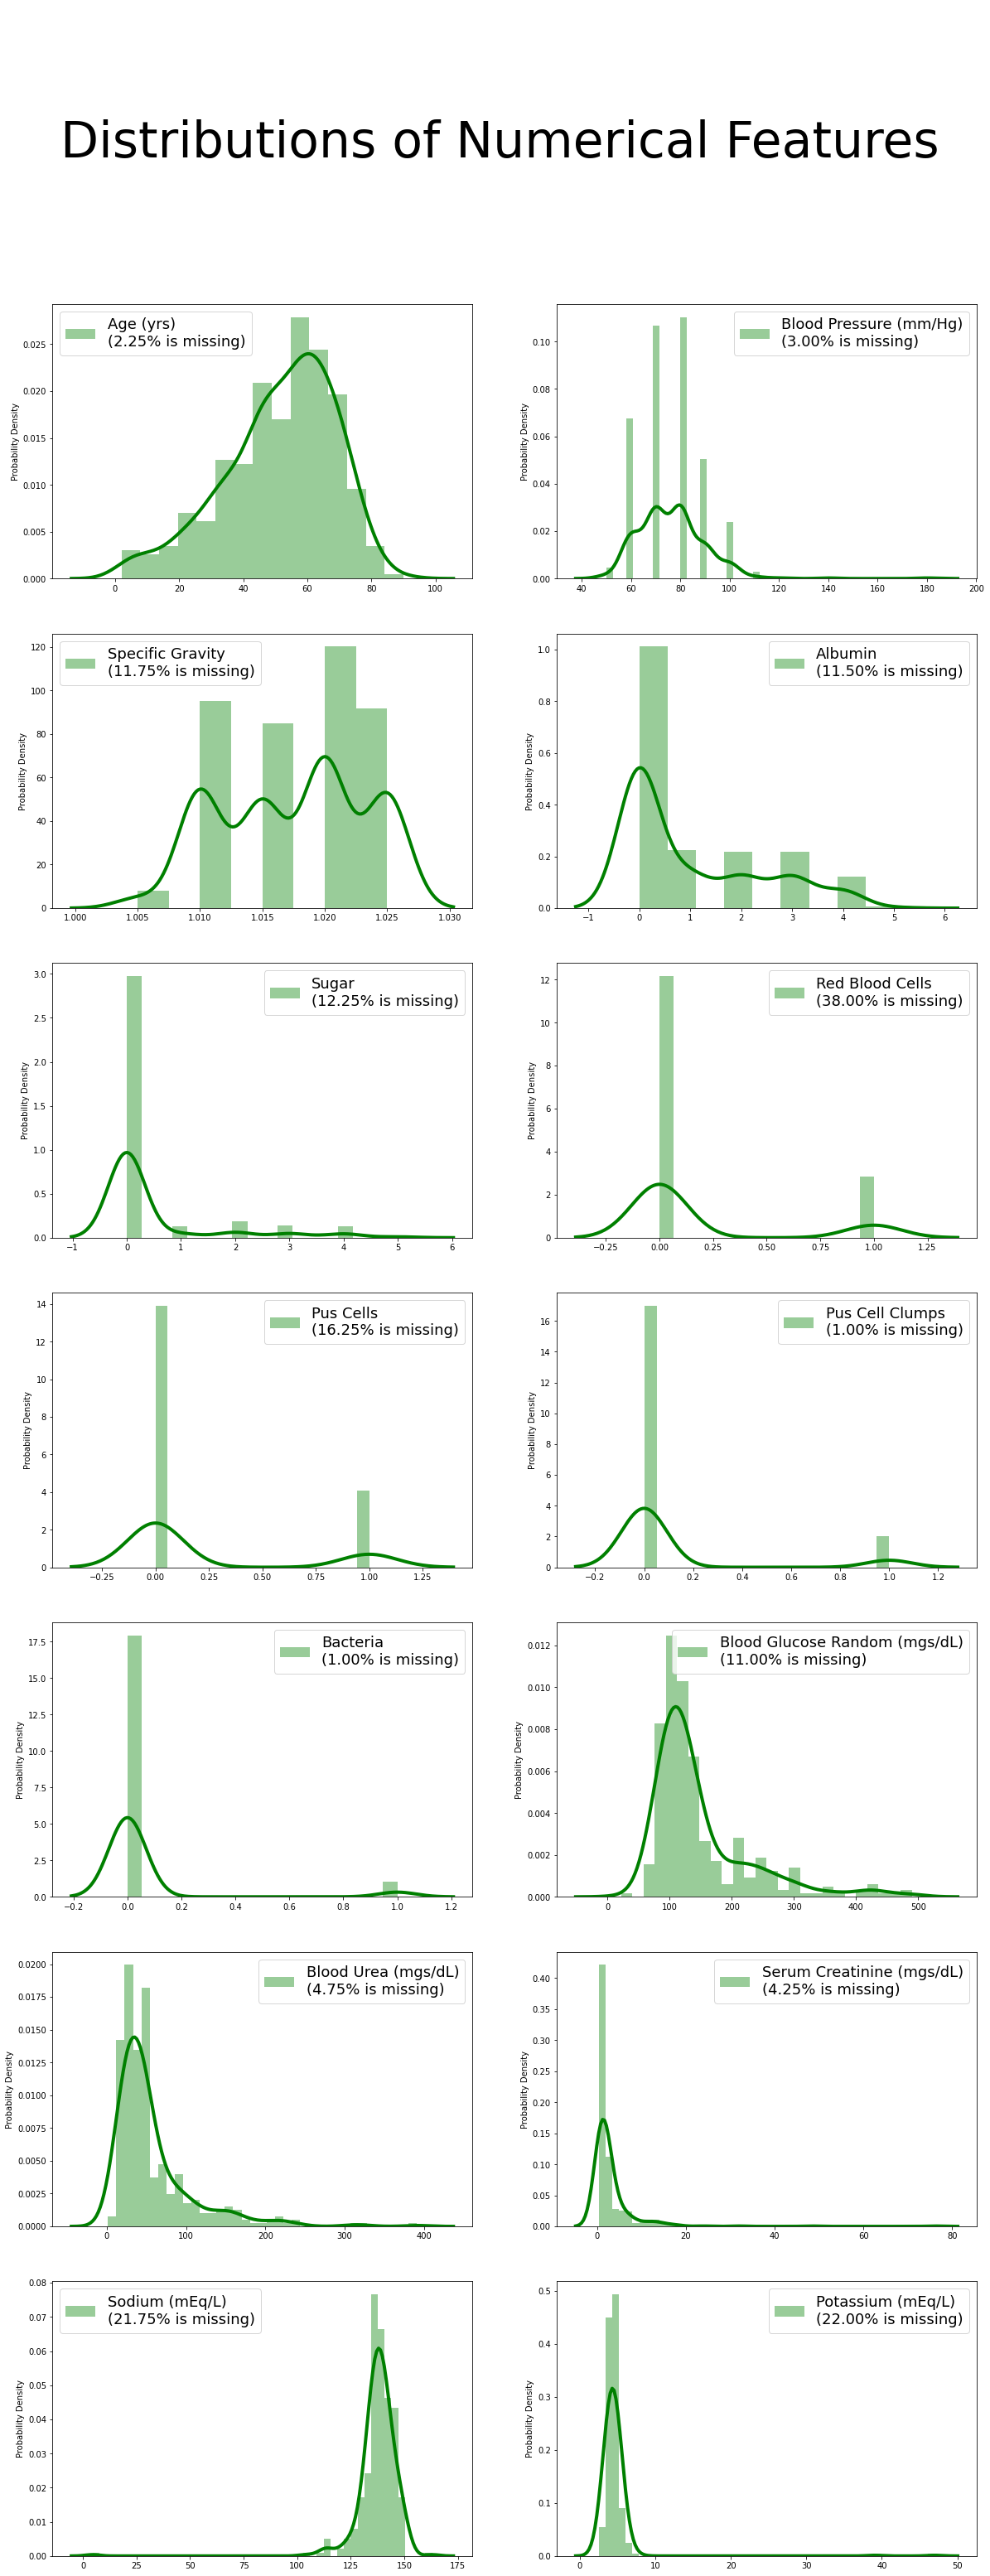

In [28]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(data[column], color="g", label=collabel, norm_hist=True,
                     ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

In [ ]:
style.use('seaborn-darkgrid')

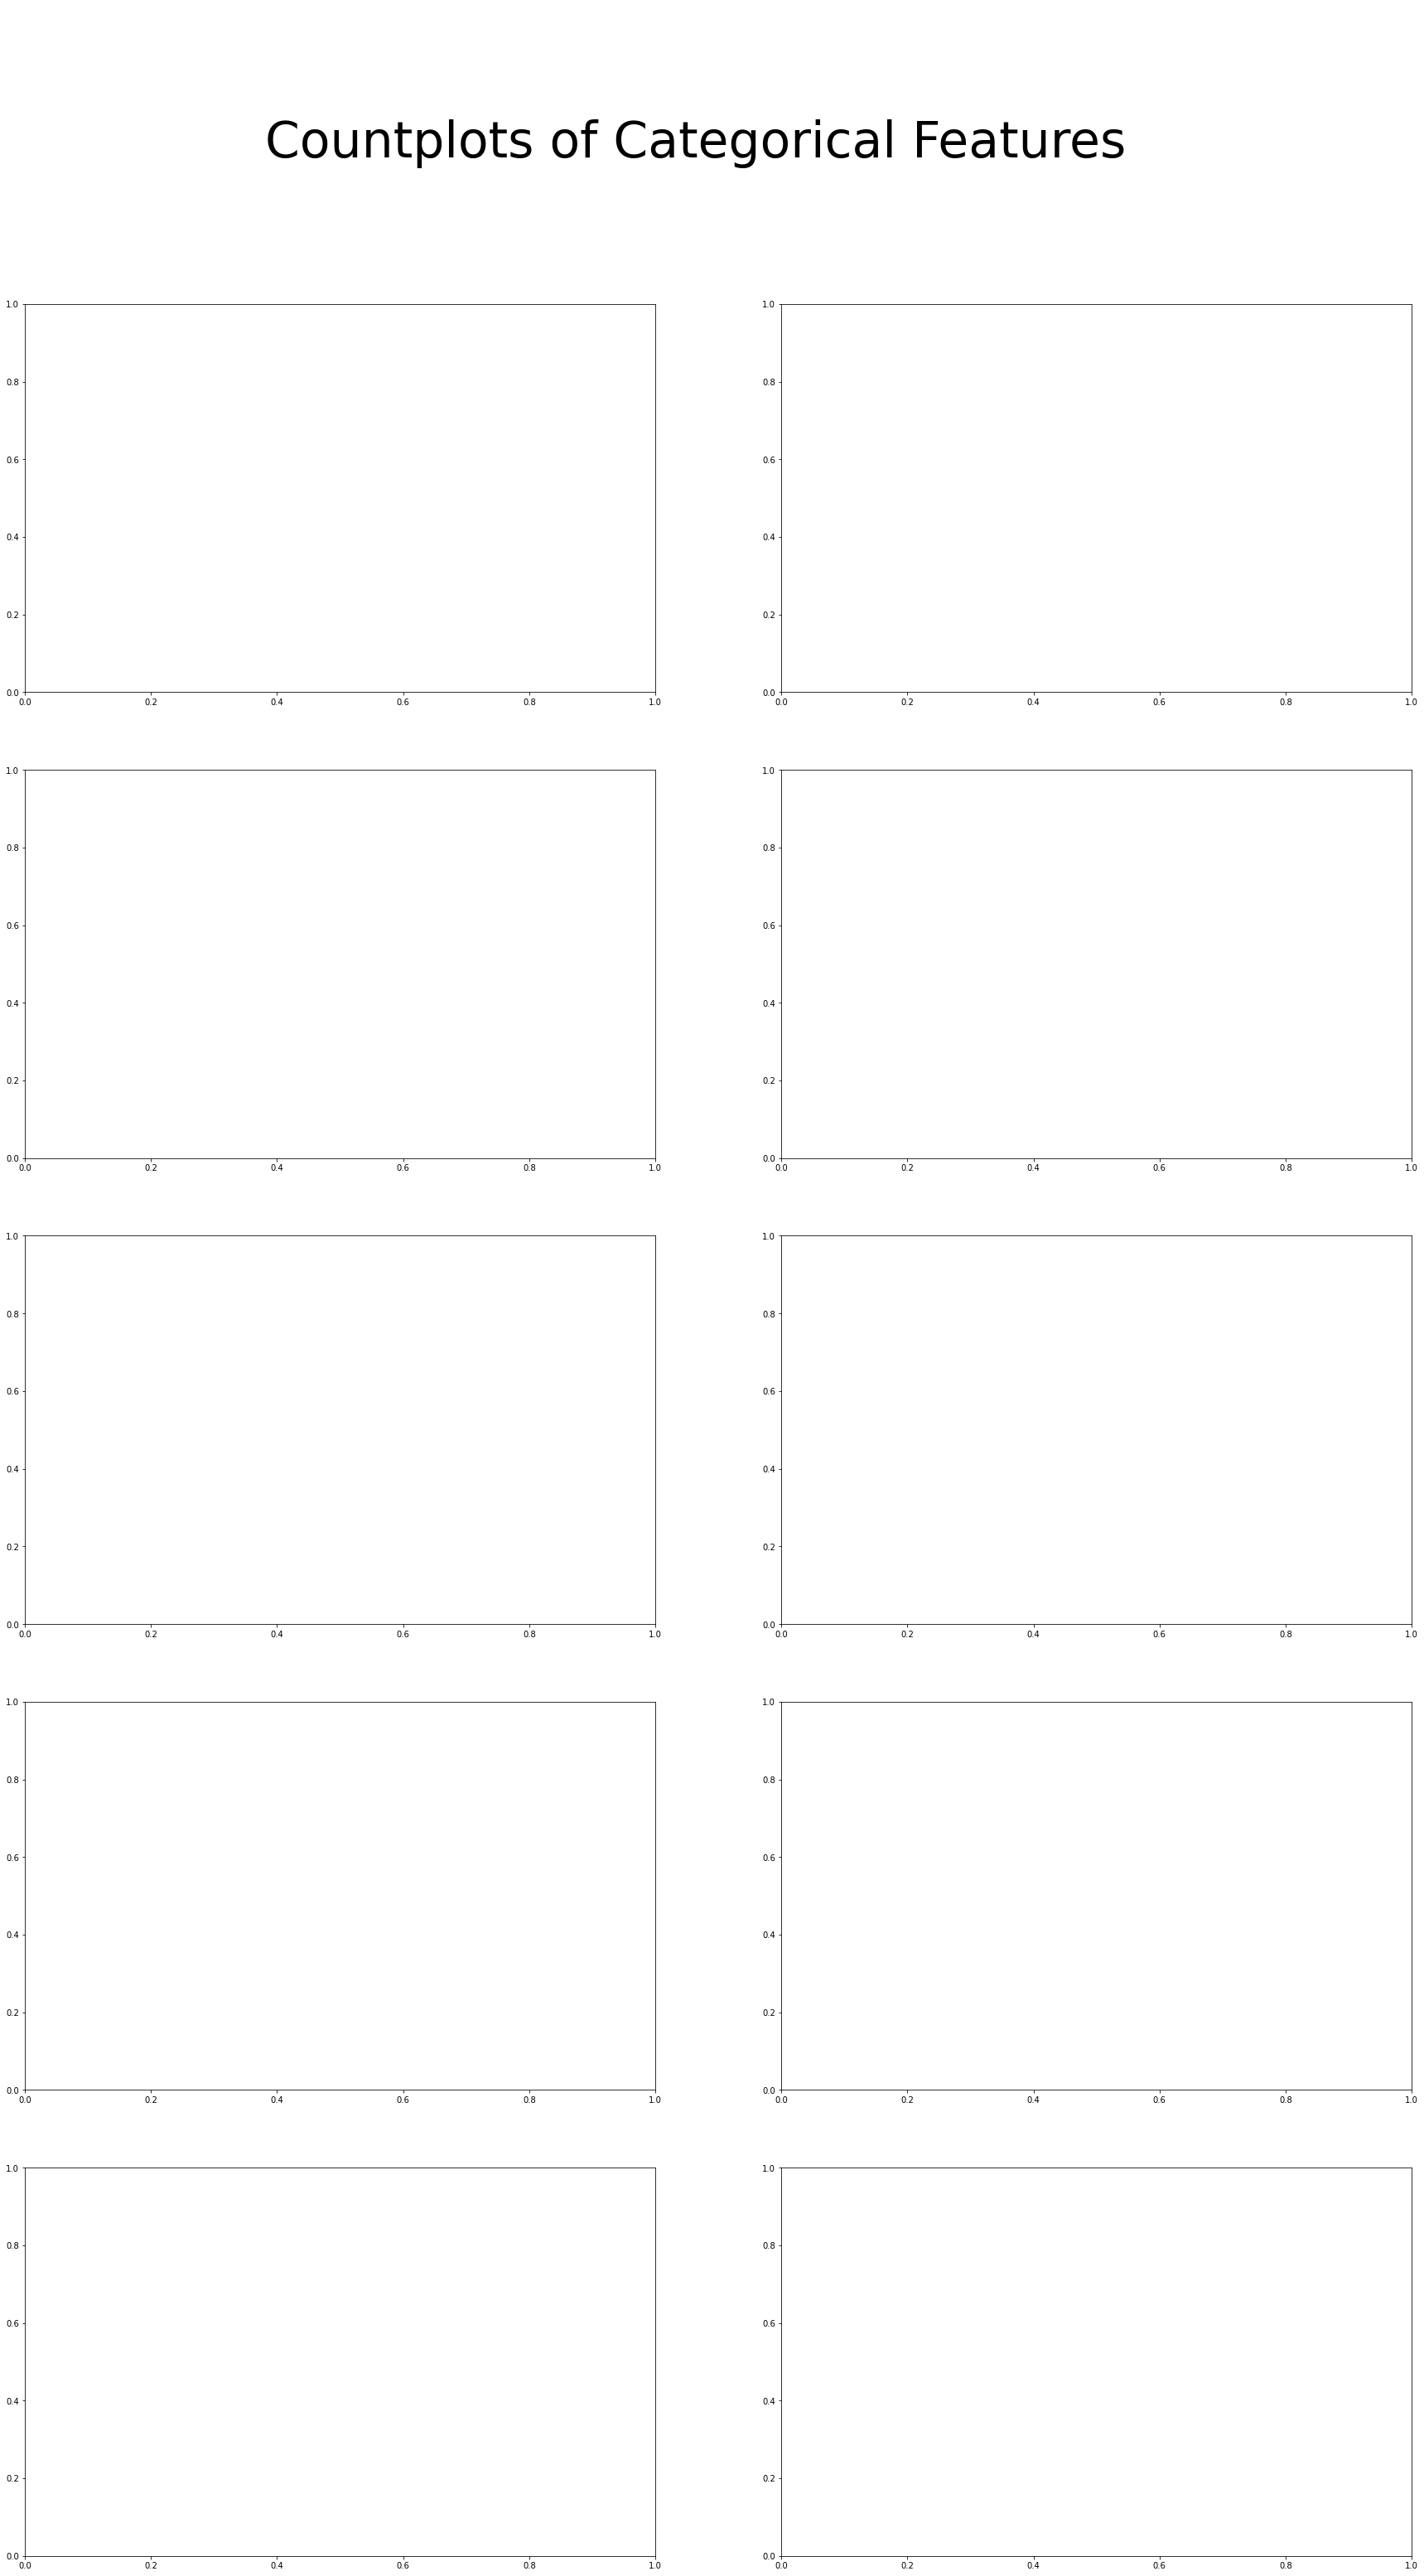

In [29]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(data[column].dropna().shape[0])/data.shape[0]))

    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=data,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=28)

plt.show()

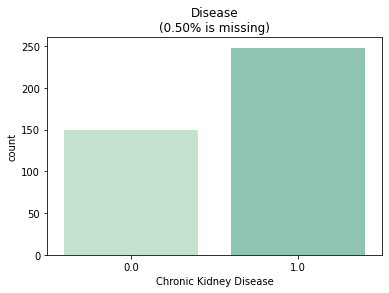

In [38]:
miss_perc="%.2f"%(100*(1-(data['Chronic Kidney Disease'].dropna().shape[0])/data.shape[0]))
    
label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=data['Chronic Kidney Disease'],label=label, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1))
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

In [ ]:
style.use('seaborn-darkgrid')

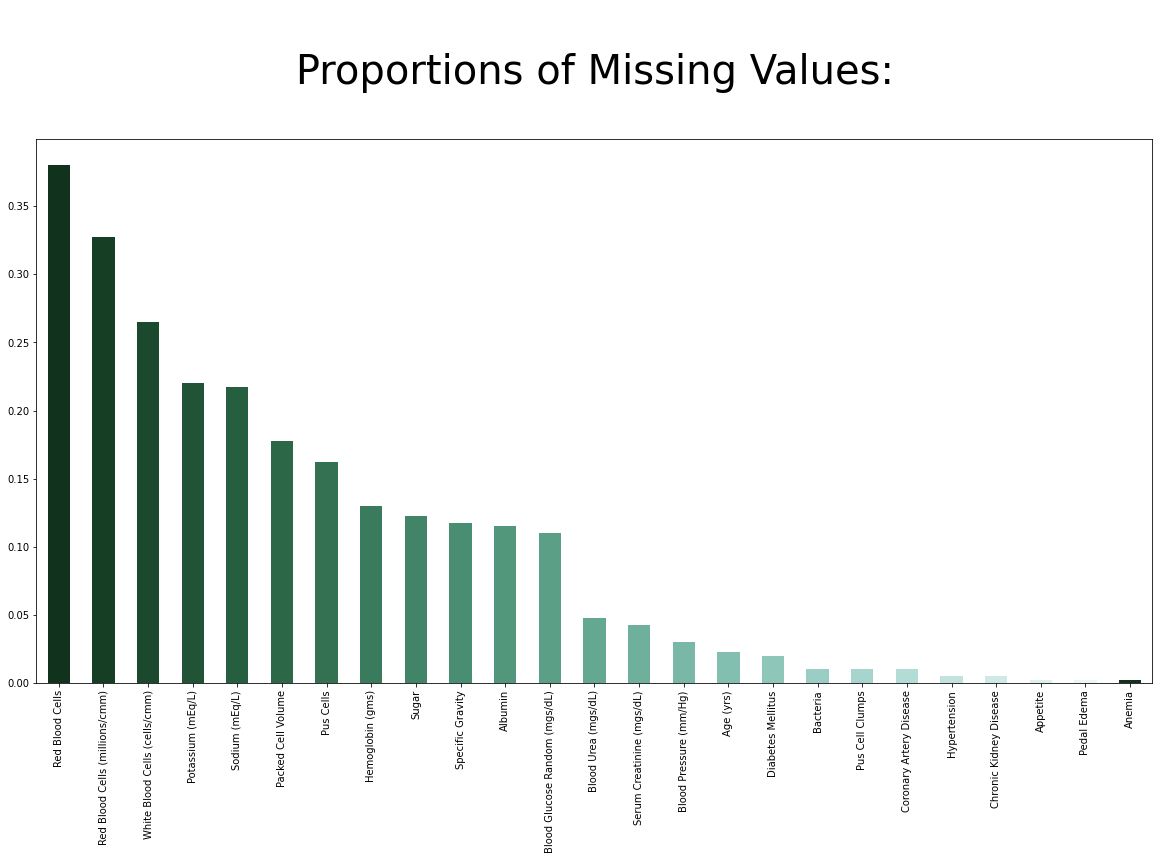

In [45]:
d=((data.isnull().sum()/data.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

One-Hot Encoding

In [46]:
onehotdata=pd.get_dummies(data,drop_first=True,prefix_sep=': ')
onehotdata.head()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [47]:
names={}
for name in data.columns:
    for ohname in onehotdata.columns:
        if name+': ' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(400):
                if type(data.loc[i,name])!=str:
                    if math.isnan(data.loc[i,name]):
                        onehotdata.loc[i,ohname]=data.loc[i,name]

In [48]:
test_oh_dt=pd.DataFrame(columns=data.columns)
for col in test_oh_dt.columns:
    if col in categoricals:
        test_oh_dt[col]=onehotdata[names[col]]
    elif col=='Chronic Kidney Disease':
        test_oh_dt[col]=onehotdata['Chronic Kidney Disease: yes']
    else:
        test_oh_dt[col]=onehotdata[col]

KeyError: ignored

In [49]:
((pd.isna(data)==pd.isna(test_oh_dt))==False).sum()

Age (yrs)                           0
Blood Pressure (mm/Hg)              0
Specific Gravity                    0
Albumin                             0
Sugar                               0
Red Blood Cells                     0
Pus Cells                           0
Pus Cell Clumps                     0
Bacteria                            0
Blood Glucose Random (mgs/dL)       0
Blood Urea (mgs/dL)                 0
Serum Creatinine (mgs/dL)           0
Sodium (mEq/L)                      0
Potassium (mEq/L)                   0
Hemoglobin (gms)                    0
Packed Cell Volume                  0
White Blood Cells (cells/cmm)       0
Red Blood Cells (millions/cmm)      0
Hypertension                        0
Diabetes Mellitus                   0
Coronary Artery Disease             0
Appetite                            0
Pedal Edema                         0
Anemia                              0
Chronic Kidney Disease            398
dtype: int64

**Trying a Few Different Transformations**

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [51]:
NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
NSPT=PowerTransformer(standardize=False) #I'll feed its output to a normalizer and see if that makes any difference.
SPT=PowerTransformer()
RS=RobustScaler() #default
WRS=RobustScaler(quantile_range=(15,85)) # a "wider" range
SS=StandardScaler()

Transformers=[NQT,UQT,NSPT,SPT,RS,WRS,SS]
MMS=MinMaxScaler()
Pipes=[] #they're not actually pipelines, except for one,
#but initially I was going to normalize all of them, and didn't bother to change the name later
for tr in Transformers:
    p=make_pipeline(tr)
    Pipes.append(p)
Pipes[2]=make_pipeline(NSPT,MMS)

In [52]:
for pipe in Pipes:
    print(pipe)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal'))])
Pipeline(steps=[('quantiletransformer', QuantileTransformer())])
Pipeline(steps=[('powertransformer', PowerTransformer(standardize=False)),
                ('minmaxscaler', MinMaxScaler())])
Pipeline(steps=[('powertransformer', PowerTransformer())])
Pipeline(steps=[('robustscaler', RobustScaler())])
Pipeline(steps=[('robustscaler', RobustScaler(quantile_range=(15, 85)))])
Pipeline(steps=[('standardscaler', StandardScaler())])


In [53]:
datarrays=[]
for pipe in Pipes:
    arr=pipe.fit_transform(onehotdata)
    datarrays.append(arr)

In [54]:
dataframes=[onehotdata]
for arr in datarrays:
    df=pd.DataFrame(arr,columns=onehotdata.columns)
    dataframes.append(df)

In [62]:
categorical_feats=onehotdata.columns[14:]
numerical_feats=onehotdata.columns[:14

SyntaxError: ignored

In [61]:
style.use('fivethirtyeight')

NameError: ignored

In [57]:
colors=['crimson','steelblue','darkorange','darkviolet','gold','mediumblue','lime']

In [60]:
n_rows, n_cols = (14,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nDistributions of Numerical Features\nAfter Different Transformations', fontsize=120)
for i in range(14):
    fig = sns.distplot(onehotdata.iloc[:,i], color="g", label='Original\nDistribution', norm_hist=True,
    
    ax=axes[i,0], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Probability Density",fontsize=25)

    for j in range(1,8):
    for i in range(14):
        label=Pipes[j-1].steps[0][0]
        
        fig = sns.distplot(dataframes[j].iloc[:,i], color=colors[j-1], label=label, norm_hist=True,

        ax=axes[i,j], kde_kws={"lw":4})
        
        fig=fig.legend(loc='best', fontsize=35)
    
        axes[i,j].set_ylabel("Probability Density",fontsize=25)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize= 33)

plt.show()

IndentationError: ignored

In [64]:
colors2=['lightcoral','lightblue','peachpuff','plum','khaki','cornflowerblue','lightgreen']

In [66]:
n_rows, n_cols = (10,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nCountplots of Categorical Features\nAfter Different Transformations', fontsize=120)
for i in range(10):
    g = sns.countplot(onehotdata.iloc[:,i+14], color="mediumaquamarine", label="Original Feature",
    
    ax=axes[i,0])
    
    g=g.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Count",fontsize=25)
    for j in range(1,8):
    for i in range(10):
        label=Pipes[j-1].steps[0][0]
        
        g = sns.countplot(dataframes[j].iloc[:,i+14], color=colors2[j-1], label=label,

        ax=axes[i,j])
        
        g=g.legend(loc='best', fontsize=35)
    
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)
    
        axes[i,j].set_ylabel("Count",fontsize=25)

plt.show()

IndentationError: ignored

Imputation

In [79]:
from sklearn.impute import KNNImputer

In [80]:
knnimp=KNNImputer(weights='distance', n_neighbors=8)

In [81]:
rrr=[onehotdata.to_numpy()]
for dfi in range(1,len(dataframes)):
    rrr.append(knnimp.fit_transform(dataframes[dfi]))

In [82]:
arrs=[rrr[0]]
for i in range(1,len(rrr)):
    arrs.append(Pipes[i-1].inverse_transform(rrr[i]))

In [83]:
impdf=[]
for i in range(len(arrs)):
    impdf.append(pd.DataFrame(arrs[i],columns=onehotdata.columns))

In [84]:
n_rows, n_cols = (14,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nDistributions of Numerical Features\nAfter Imputation', fontsize=120)
for i in range(14):
    fig = sns.distplot(onehotdata.iloc[:,i], color="g", label='Original Feature\n Distribution', norm_hist=True,
    
    ax=axes[i,0], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Probability Density",fontsize=25)
    for j in range(1,8):
    for i in range(14):
        label=Pipes[j-1].steps[0][0]
        
        fig = sns.distplot(impdf[j].iloc[:,i], color=colors[j-1], label=label, norm_hist=True,

        ax=axes[i,j], kde_kws={"lw":4})
        
        fig=fig.legend(loc='best', fontsize=35)
    
        axes[i,j].set_ylabel("Probability Density",fontsize=25)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)
        
plt.show()


IndentationError: ignored

NameError: ignored

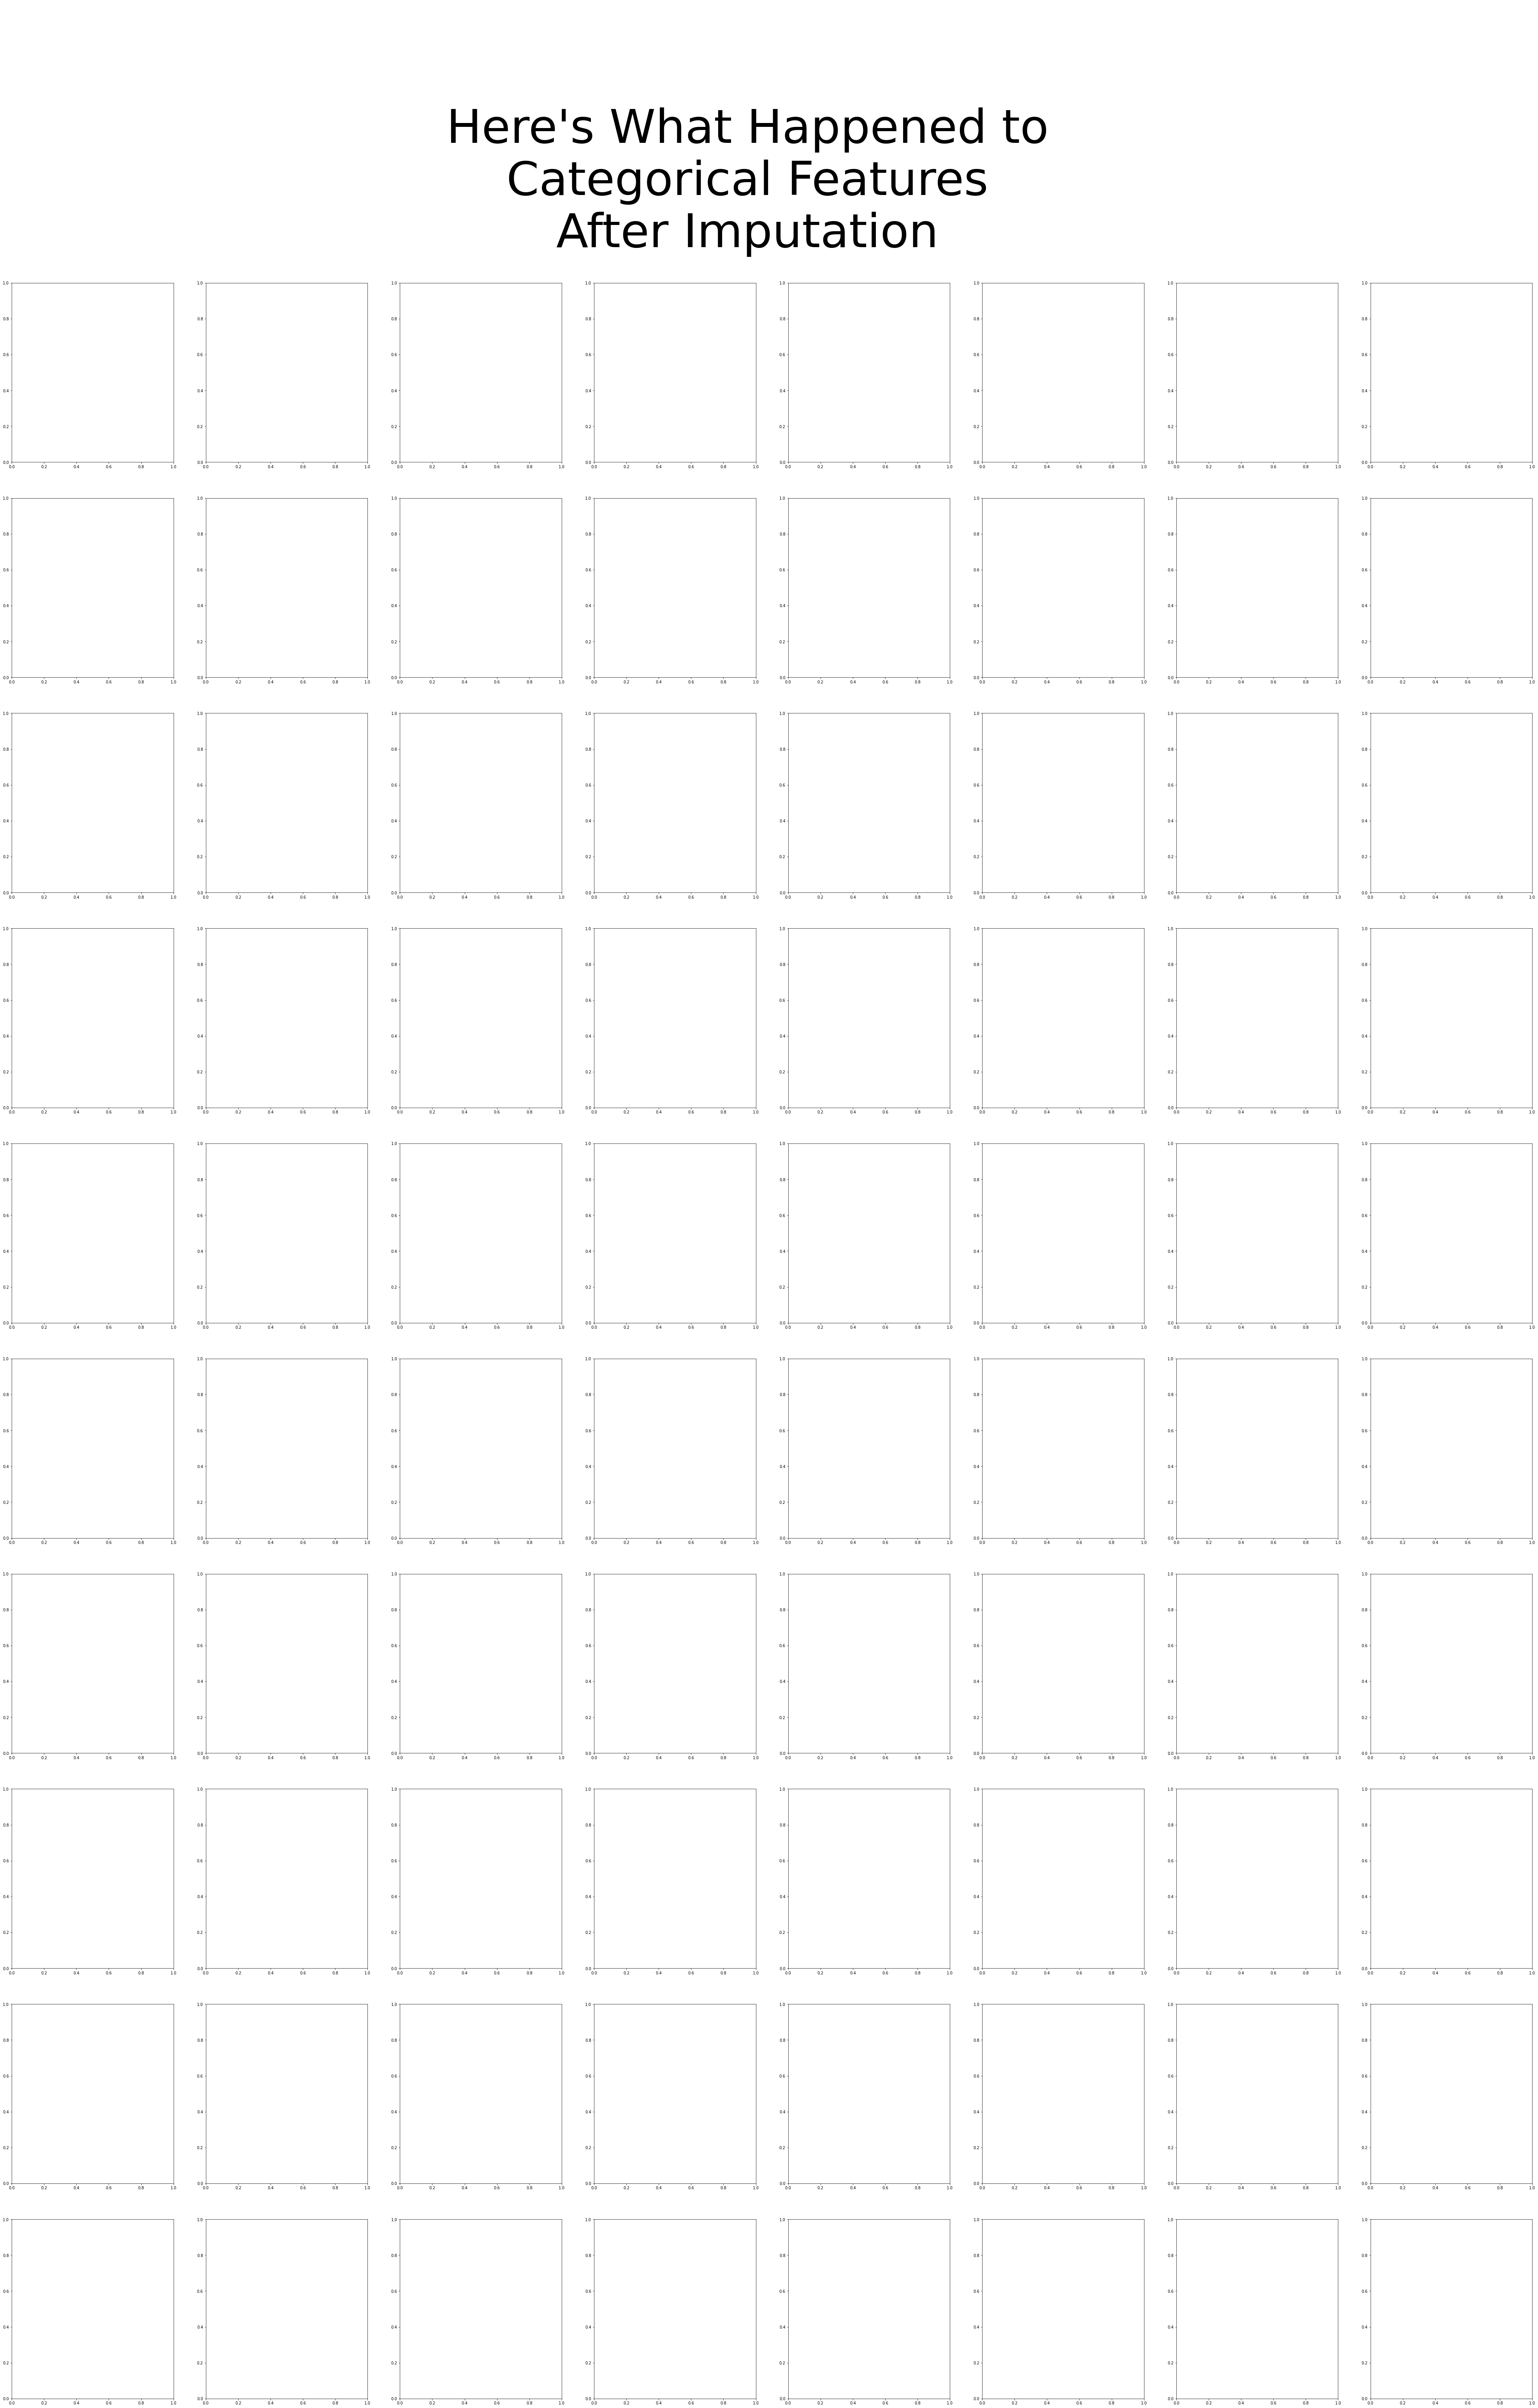

In [85]:
n_rows, n_cols = (10,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle("\n\nHere's What Happened to\nCategorical Features\nAfter Imputation", fontsize=120)
for i in range(10):
    g = sns.countplot(onehotdata.iloc[:,i+14], color="mediumaquamarine", label=categorical_feats[i],
    
    ax=axes[i,0])
    
    g=g.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    axes[i,0].set_ylabel("Count",fontsize=25)

for j in range(1,8):
    for i in range(10):
        label=Pipes[j-1].steps[0][0]
        
        g = sns.countplot(impdf[j].iloc[:,i+14], color=colors2[j-1], label=label,

        ax=axes[i,j])
        
        g=g.legend(loc='best', fontsize=35)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)
    
        axes[i,j].set_ylabel("Count",fontsize=25)
        

plt.show()


In [86]:
impdf[6].iloc[:,15].unique()

array([44.        , 38.        , 31.        , 32.        , 35.        ,
       39.        , 36.        , 33.        , 29.        , 28.        ,
       35.07884436, 16.        , 24.        , 37.15673266, 33.41667563,
       37.        , 30.        , 29.56909239, 44.38502241, 42.        ,
       34.        , 33.07117407, 34.90212085, 40.        , 36.32804755,
       32.14613949, 45.        , 34.03614609, 23.05580825, 32.63813762,
       38.99462465, 27.        , 35.26857587, 48.        , 39.85255473,
       41.52596982, 52.        , 34.34560683, 14.        , 31.21358257,
       36.38886257, 38.50706762, 22.        , 36.33818952, 39.54904443,
       38.80638995, 39.05677627, 30.72597988, 18.        , 37.32488859,
       35.25247926, 17.        , 40.35976768, 30.61722777, 36.98306422,
       35.51551593, 35.97225147, 37.10147527, 36.97547915, 46.        ,
       26.96559105, 33.78361974, 23.        , 33.48802239, 38.58233129,
       35.73168963, 43.49411713, 19.        , 35.46099302, 31.30

In [87]:
test=impdf.copy()
for j in range(1,8):
    dat=test[j]
    for i in range(14,25):
        col=dat.iloc[:,i]
        for k in range(400):
            if col[k]>=0.5:
                col[k]=1
            else:
                col[k]=0

In [88]:
test[6].iloc[:,16].unique()

array([1.])

In [ ]:
n_rows, n_cols = (10,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nCountplots of Categorical Features\nAfter Imputation', fontsize=120)
for i in range(10):
    g = sns.countplot(onehotdata.iloc[:,i+14], color="mediumaquamarine", label=categorical_feats[i],
    
    ax=axes[i,0])
    
    g=g.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Count",fontsize=25)
    for j in range(1,8):
    for i in range(10):
        label=categorical_feats[i]+'\n'+Pipes[j-1].steps[0][0]
        
        g = sns.countplot(test[j].iloc[:,i+14], color=colors2[j-1], label=label,

        ax=axes[i,j])
        
        g=g.legend(loc='best', fontsize=35)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)
    
        axes[i,j].set_ylabel("Count",fontsize=25)

plt.show()

In [90]:
impdf=test

In [ ]:
fwmmv=list(numerical_feats.copy())
the_other_ones=['Age (yrs)','Blood Pressure (mm/Hg)','Serum Creatinine (mgs/dL)','Blood Urea (mgs/dL)']
for f in range(len(the_other_ones)):
    if the_other_ones[f] in fwmmv:
        fwmmv.remove(the_other_ones[f])
fwmmv.extend(('Red Blood Cells: normal','Pus Cells: normal')) 

In [70]:
indices=[1,6,7]

In [ ]:
n_rows, n_cols = (12,4)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 60))
figure.suptitle('\n\nBest Results\nFor Features With More\nThan 10% Missing Values', fontsize=50)

for index, column in enumerate(fwmmv):
    
    if index<10:
        
        miss_perc1="%.2f"%(100*(1-(onehotdata[column].dropna().shape[0])/onehotdata.shape[0]))

        collabel1='Original Data'+"\n({}% is missing)".format(miss_perc1)
    
        fig1=sns.distplot(onehotdata[column], color="g", labe
                          l=collabel1, norm_hist=True,
    
        ax=axes[index,0], kde_kws={"lw":4})
    
        fig1=fig1.legend(loc='best', fontsize=12)
        
        axes[index,0].set_ylabel("Probability Density",fontsize='medium')
    
        for j in indices:

            miss_perc2="%.2f"%(100*(1-(impdf[j][column].dropna().shape[0])/impdf[j].shape[0]))

            collabel2=Pipes[j-1].steps[0][0]+"\n({}% is missing)".format(miss_perc2)
            fig2=sns.distplot(impdf[j][column], color=colors[j-1], label=collabel2, norm_hist=True,

            ax=axes[index,j-5+1], kde_kws={"lw":1.5})

            fig2=fig2.legend(loc='best', fontsize=12)
            
            axes[index,j-5+1].set_ylabel("Probability Density",fontsize='medium')
    else:
        
        miss_perc1="%.2f"%(100*(1-(onehotdata[column].dropna().shape[0])/onehotdata.shape[0]))

        collabel1='Original Data'+"\n({}% is missing)".format(miss_perc1)
        fig1=sns.countplot(onehotdata[column], color="mediumaquamarine", label=collabel1,
    
        ax=axes[index,0])
    
        fig1=fig1.legend(loc='best', fontsize=12)
        
        axes[index,0].set_ylabel("Count",fontsize='medium')
        
        for j in indices:

            miss_perc2="%.2f"%(100*(1-(impdf[j]
                                       
            ax=axes[index,j-5+1])

            fig2=fig2.legend(loc='best', fontsize=12)
            
            axes[index,j-5+1].set_ylabel("Count",fontsize='medium')

plt.show()
[column].dropna().shape[0])/impdf[j].shape[0]))

            collabel2=Pipes[j-1].steps[0][0]+"\n({}% is missing)".format(miss_perc2)

            fig2=sns.countplot(impdf[j][column], color=colors2[j-1], label=collabel2,

In [94]:
onehotdata=impdf[1].copy()

In [68]:
onehotdata.dropna().shape

(158, 25)

# **Exploratory Data Analysis**

In [ ]:
style.use('seaborn-darkgrid')

In [ ]:
n_rows, n_cols = (11,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 130))
figure.suptitle('\n\n\nDistributions of Categorical Variables\n(Original Data)', fontsize=80)

for i in range(len(categoricals)):
    column=categoricals[i]
    graph1=data[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                      ax=axes[i,0],
                                                      colorma
                                                p="tab20c",
                                                      fontsize=25,
                                                      shadow=True,
                                                      explode=[0.1,0])
    axes[i,0].set_ylabel('%',fontsize=25)
    axes[i,0].set_title(column+' (percentages)', fontsize=30)
    graph2=sns.countplot(x=column,
                         data=data,
                         palette='Blues_r',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=25)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), Fontsize=18)
    axes[i,1].set_title(column+' (value counts)', fontsize=3
                        0)
    

graph1=data['Chronic Kidney Disease'].value_counts().plot.pie(autopct='%1.1f%%',
                                                              ax=axes[10,0],
                                                              colormap='tab20c',
                                                              fontsize=25,
                                                              shadow=True,
                                                              explode=[0.1,0])
axes[10,0].set_ylabel("%",fontsize=25)
axes[10,0].set_title('Chronic Kidney Disease (percentages)',fontsize=30)
graph2=sns.countplot(x='Chronic Kidney Disease',
                     data=data,
                     palette='Blues_r',
                     ax=axes[10,1])
axes[10,1].set_xlabel(None,fontsize=25)
axes[10,1].set_ylabel("Count",fontsize=25)
axes[10,1].set_xticklabels(axes[10,1].get_xticklabels(), Fontsize=18)
axes[10,1].set_title('Chronic Kidney Disease (value counts)', fontsize=30)

plt.show()

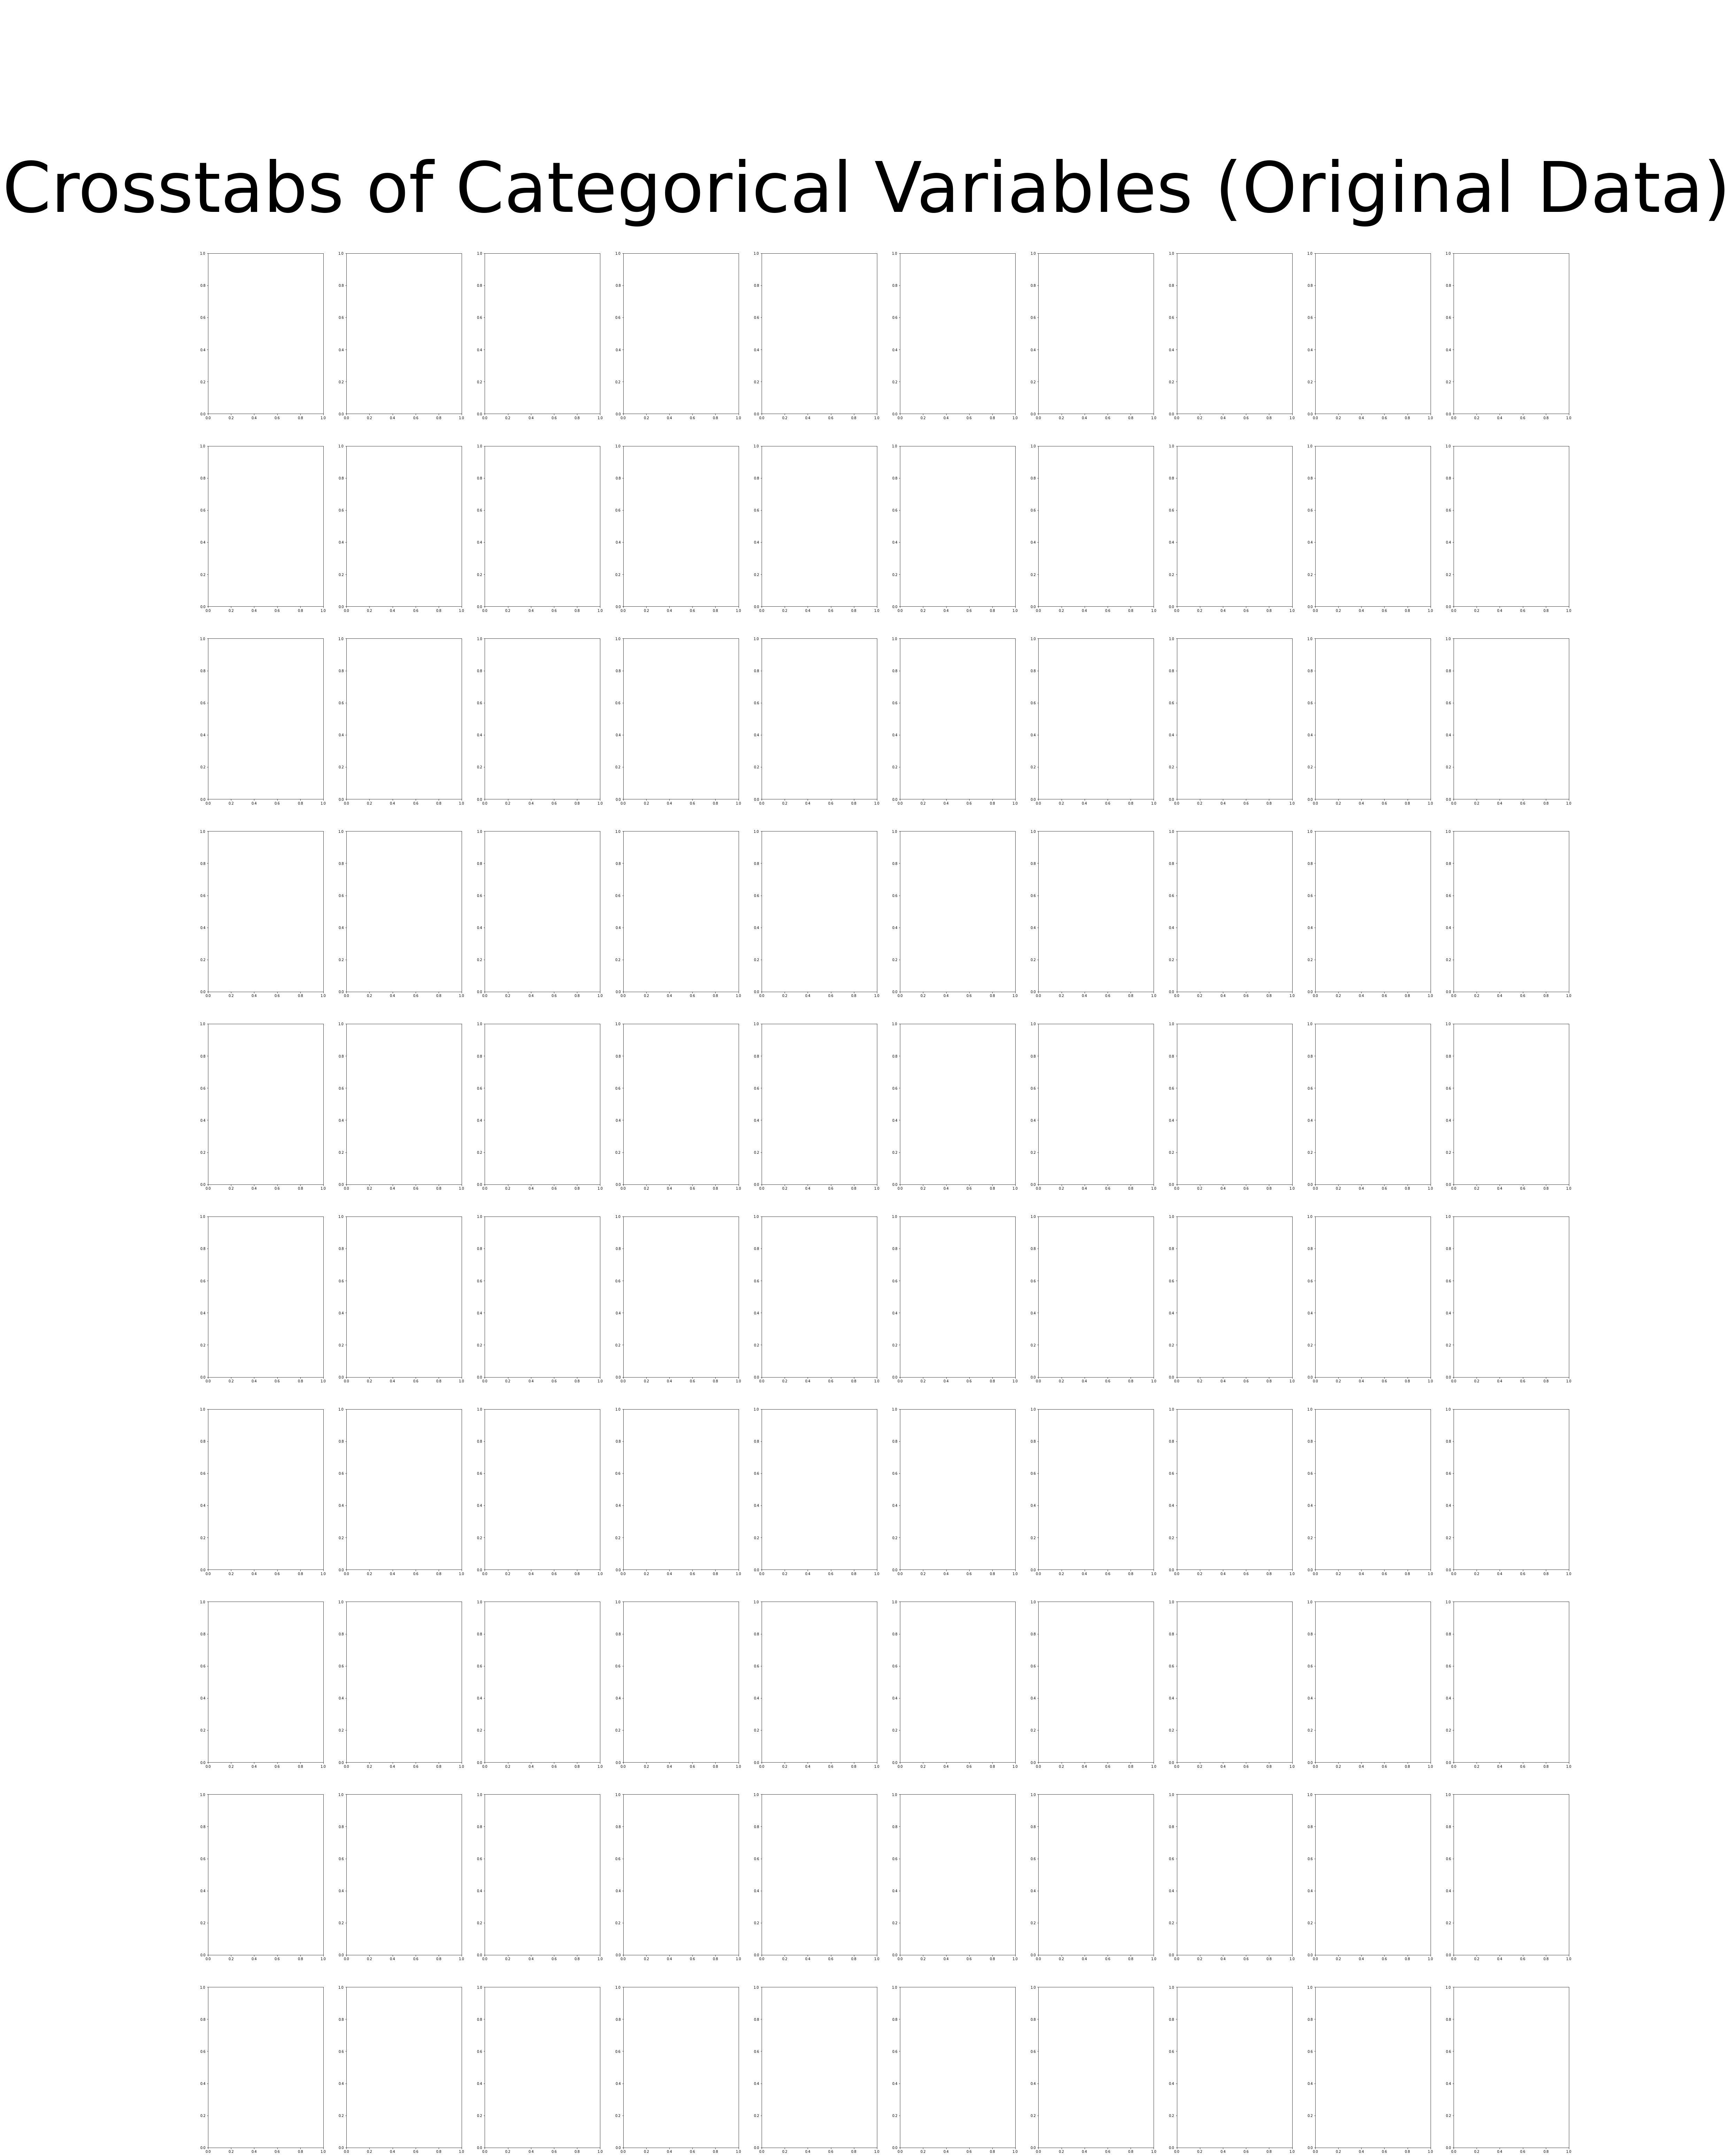

In [96]:
n_rows, n_cols = (10,10)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nCrosstabs of Categorical Variables (Original Data)\n', fontsize=200)

for i in range(10):
    for j in range(10):
        sns.heatmap(#pd.crosstab(onehotdata.iloc[:,i+14],onehotdata.iloc[:,j+14]),
                    pd.crosstab(data[categoricals[i]],data[categoricals[j]]),
                    ax=axes[i,j],
                    cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                    square='True',
                     cbar=False,
                    annot=True,
                    annot_kws={'fontsize':52},
                    fmt='d')
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=28)
        
        axes[i,j].set_ylabel(axes[i,j].get_ylabel(),fontsize=28)
        
plt.show()

In [ ]:
style.use('seaborn-darkgrid')

In [ ]:
n_rows, n_cols = (14,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 100))
figure.suptitle('\n\n\nDistributions of Numerical Variables\n(Original Data)', fontsize=100)

for i in range(len(numeric)):
    col=numeric[i]
    
    label='Mean = {}\nMedian = {}\nStandard Deviation = {}'.format("%.2f"%data[col].mean(),
                                                                    "%.2f"%data[col].median(),
                                                           "%.2f"%data[col].std())
    
    graph1=sns.distplot(data[col],
                        color="navy",
                        ax=axes[i,0],
                        kde_kws={"lw":4},
                        norm_hist=True,
                        label=label).legend(loc='best',fontsize=20)
    axes[i,0].set_title(col+': Density',fontsize=30)
    axes[i,0].set_xlabel(None)
    axes[i,0].set_ylabel("Pobability Density",fontsize=18)

    graph20=sns.violinplot(x=col,
                          data=data,
                          ax=axes[i,1],
                          color='lavender',
                          inner='box')
    graph21=sns.boxplot(x=col,
                        data=data,
                        ax=axes[i,1],
                        fliersize=8,
                        boxprops=dict(alpha=0))
    
    axes[i,1].set_xlabel(None)
    axes[i,1].set_title(col+': Quartiles',fontsize=30)
    
    
plt.show()

In [ ]:
numericdat=data.drop(categoricals, axis=1, inplace=False)

plt.figure(figsize=(20,20))

sns.heatmap(numericdat.corr("pearson"),
            cmap=sns.diverging_palette(280, 280, s=100, l=35, as_cmap=True,sep=80),
            square=True,
            annot=True,
            annot_kws={'fontsize':20},
            fmt='.2%',
            cbar=False)
plt.title("Pearson Correlation Matrix\n",fontsize=60)
plt.show()

In [ ]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 100))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=100)

for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    sns.heatmap(pd.crosstab(data[column],data['Chronic Kidney Disease']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=90)

    axes[i,j].set_ylabel(column,fontsize=90)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=50)
    
plt.show()

IndexError: ignored

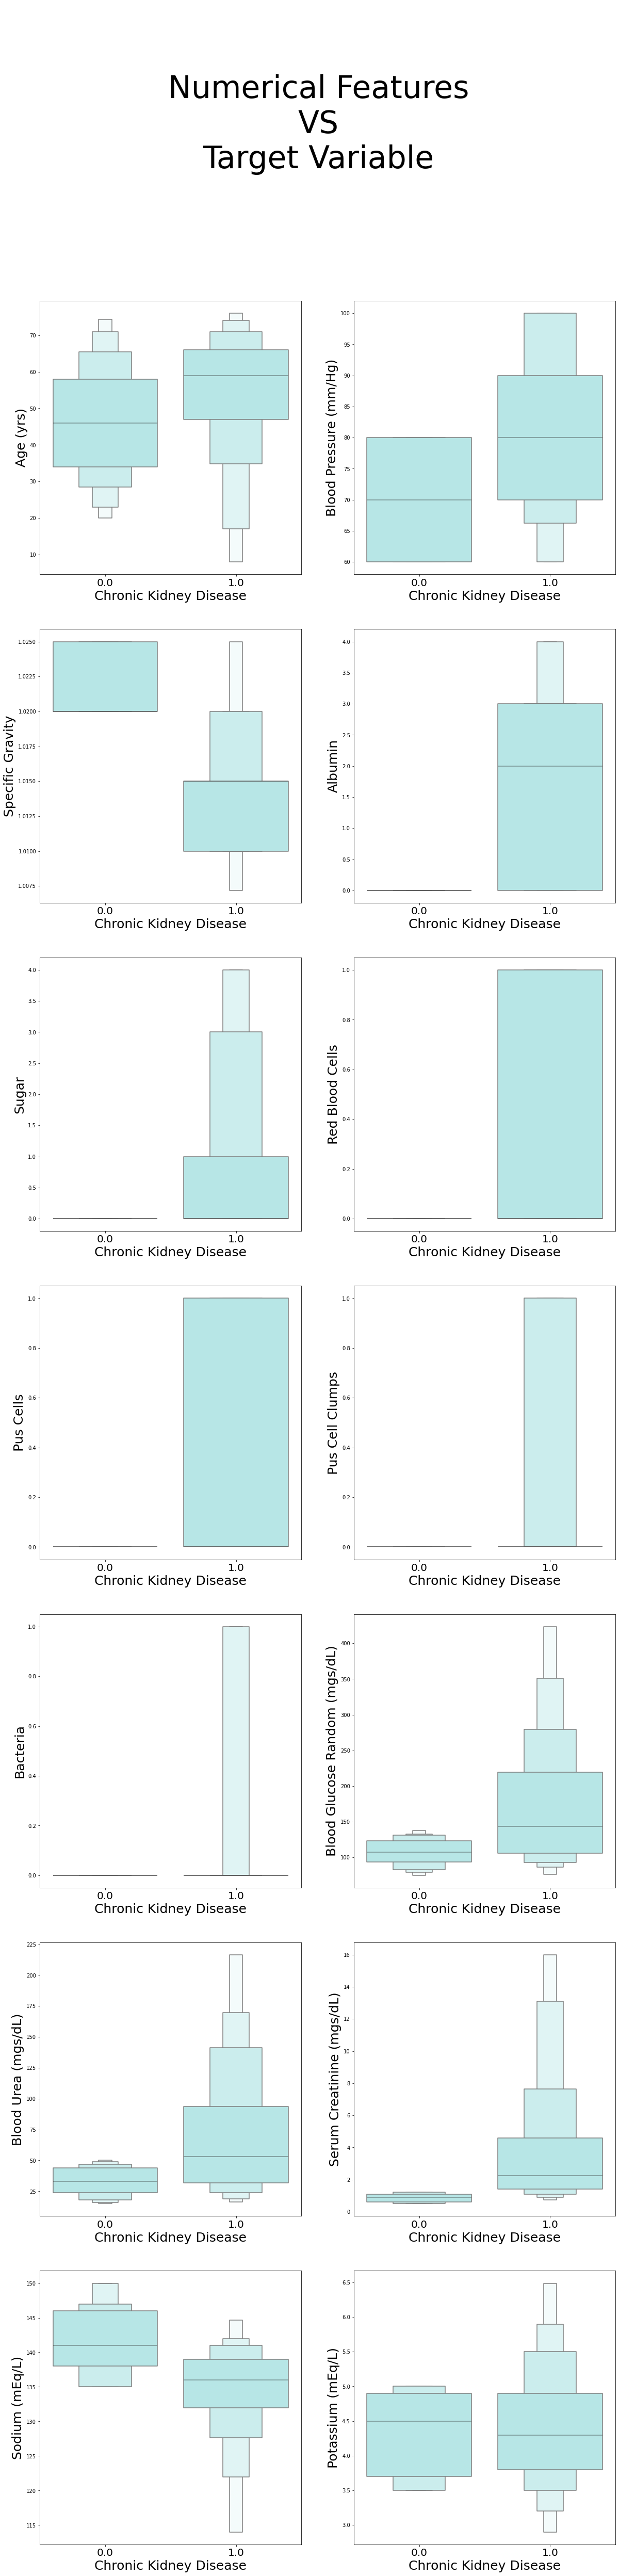

In [97]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nNumerical Features\nVS\nTarget Variable', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    bp=sns.boxenplot(y=column, x='Chronic Kidney Disease', data=data, color="paleturquoise",
    
    ax=axes[i,j], showfliers=False)
        
    axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=25)
    axes[i,j].set_ylabel(column,fontsize=25)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=20)

plt.show()

In [98]:
colors3=['deepskyblue','turquoise','mediumspringgreen','turquoise']

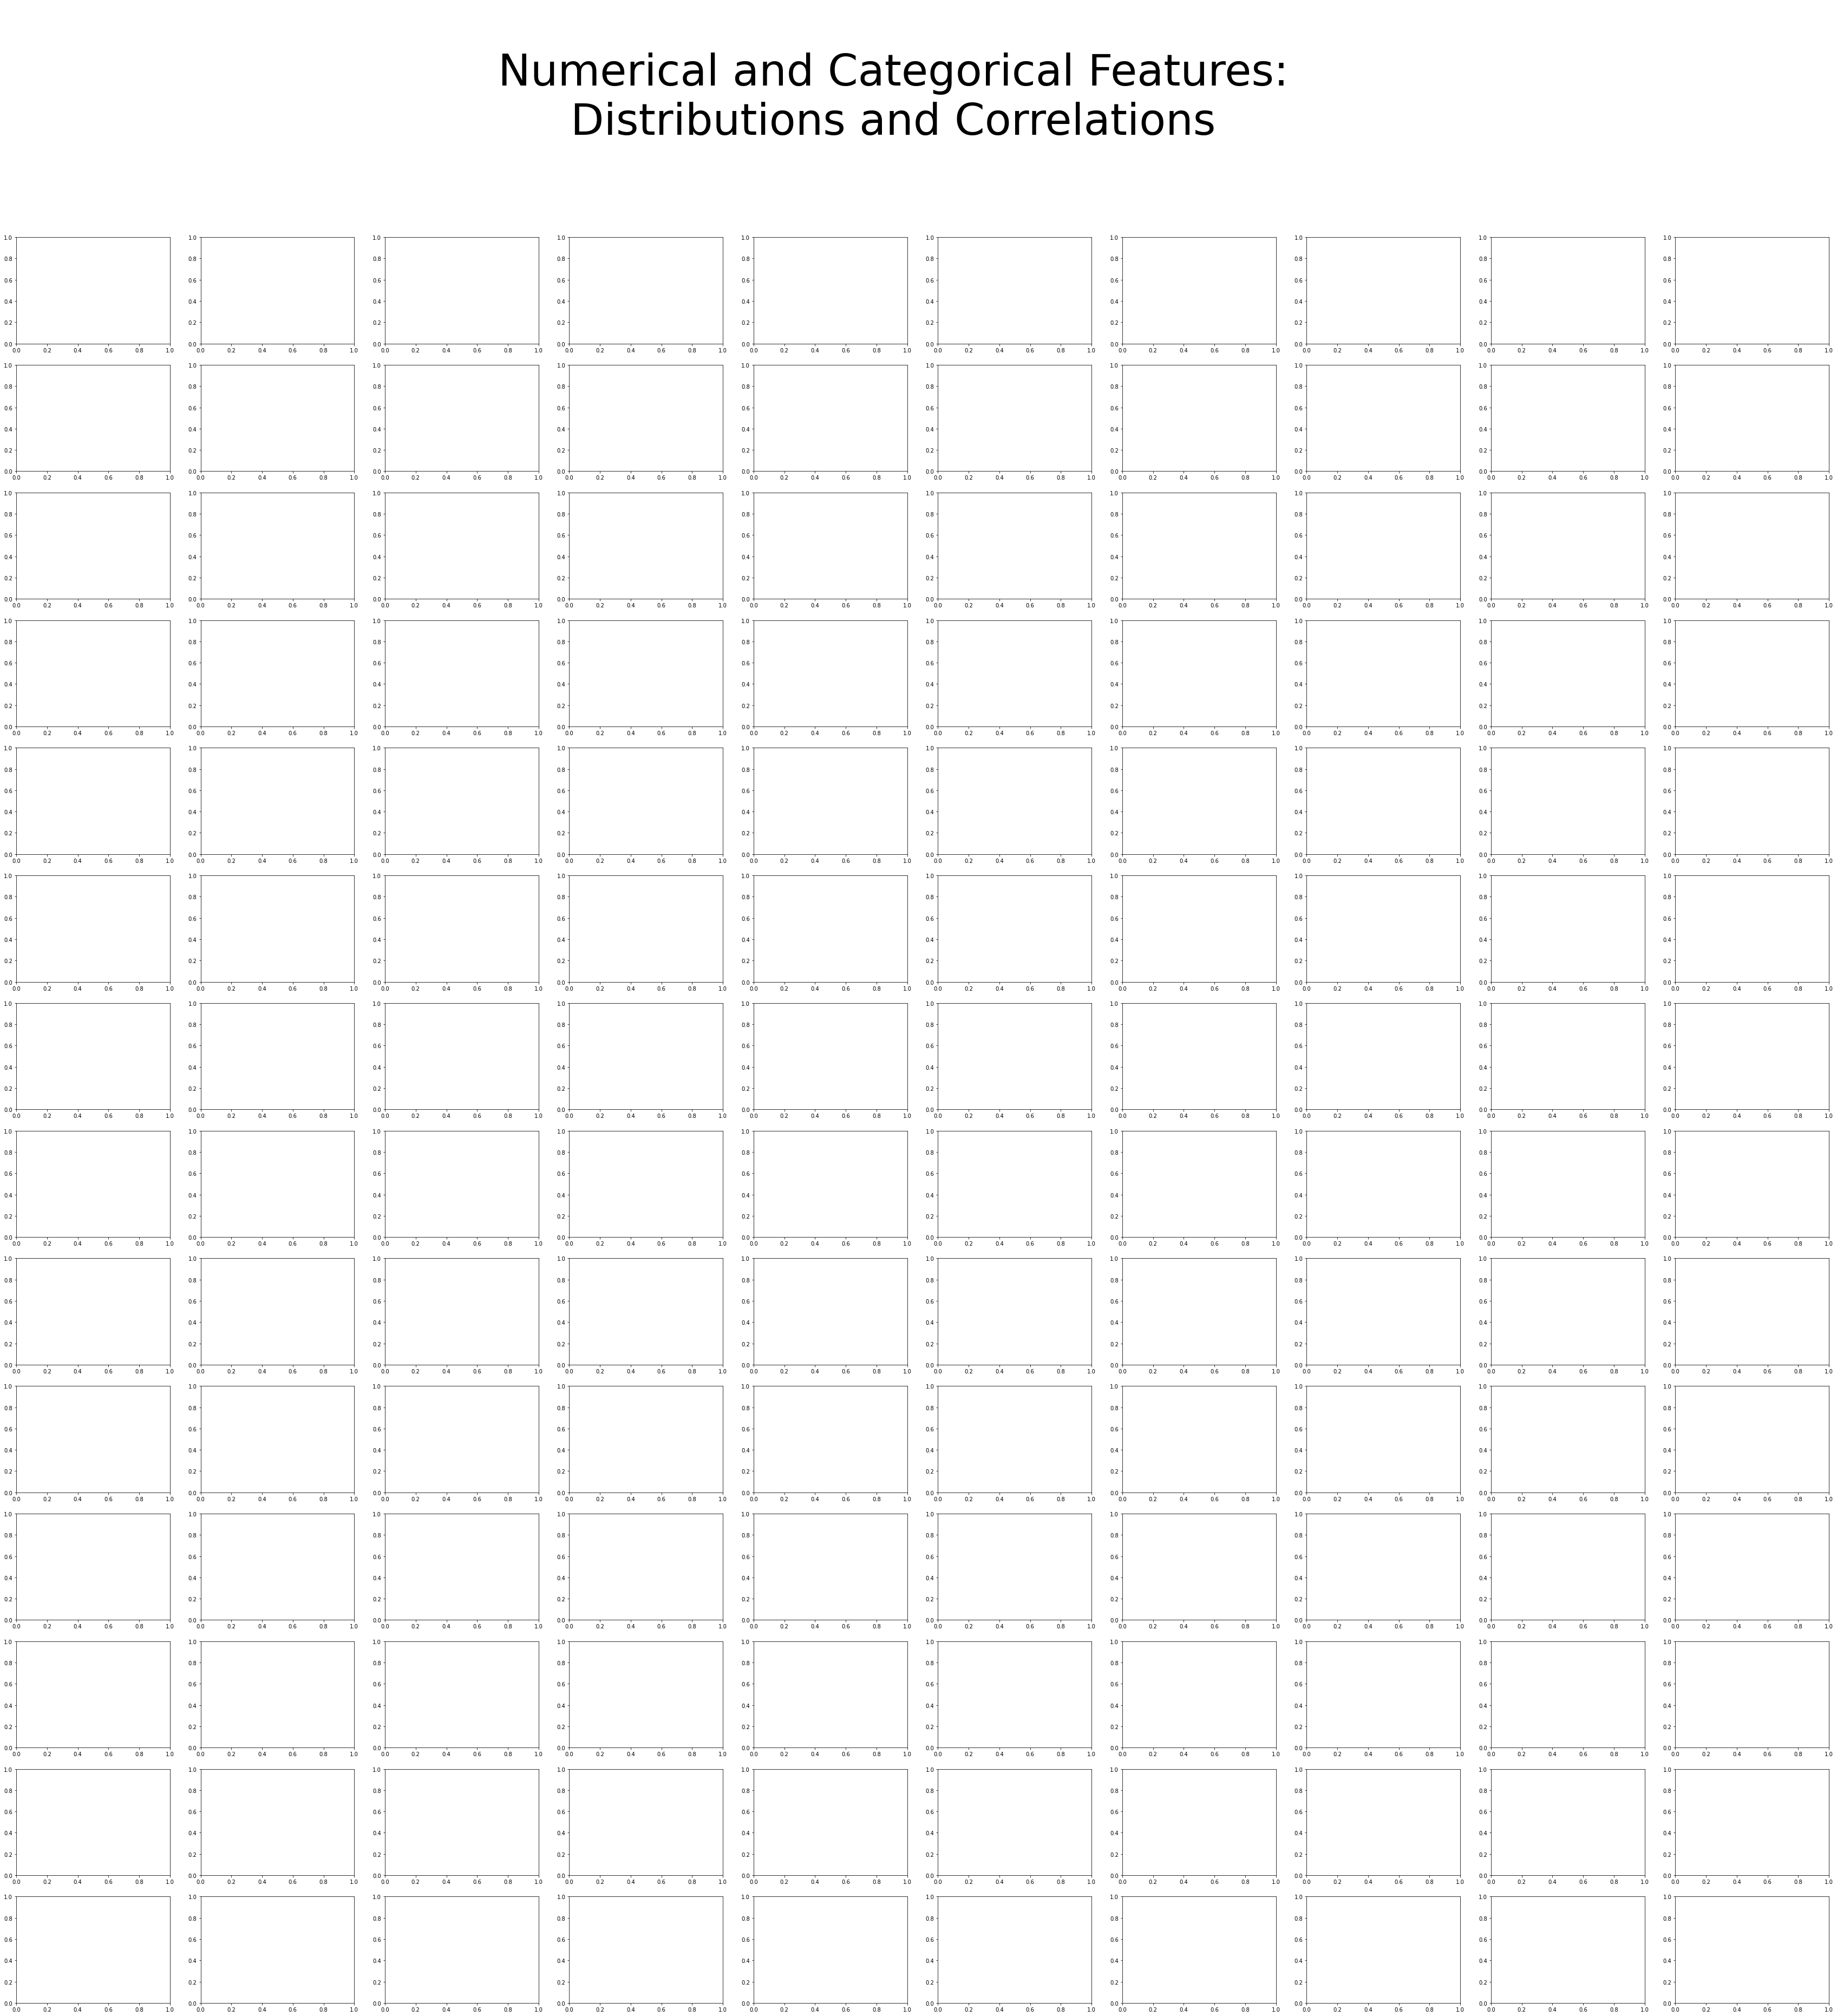

In [99]:
n_rows, n_cols = (14,10)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(60, 60))
figure.suptitle('\nNumerical and Categorical Features:\nDistributions and Correlations', fontsize=80)

for i in range(14):
    for j in range(10):
        graph=sns.violinplot(y=numeric[i],x=categoricals[j],data=data,color=colors3[j%4],ax=axes[i,j])
plt.show() 

# **Prediction**
 **Prediction Using K-Means Clustering**

In [ ]:
X=onehotdata.drop("Chronic Kidney Disease: yes",axis=1,inplace=False)
Y=onehotdata["Chronic Kidney Disease: yes"]

In [ ]:
full_scaled_data=SS.fit_transform(onehotdata)
scaled_data=SS.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans 

In [100]:
inertias = []

ks=list(range(1,9))

for k in ks:
    model=KMeans(n_clusters=k)
    
    model.fit(scaled_data)
    
    inertias.append(model.inertia_)

plt.figure(figsize=(15,7.5))
sns.barplot(ks, inertias, palette='mako')
plt.xlabel('Number of Clusters',fontsize=30)
plt.ylabel('Inertia',fontsize=35)
plt.xticks(ks)
plt.title("Inertia per Number of Clusters\n(Target Variable Excluded from the Dataset)",fontsize=40)
plt.show()

NameError: ignored

NameError: ignored

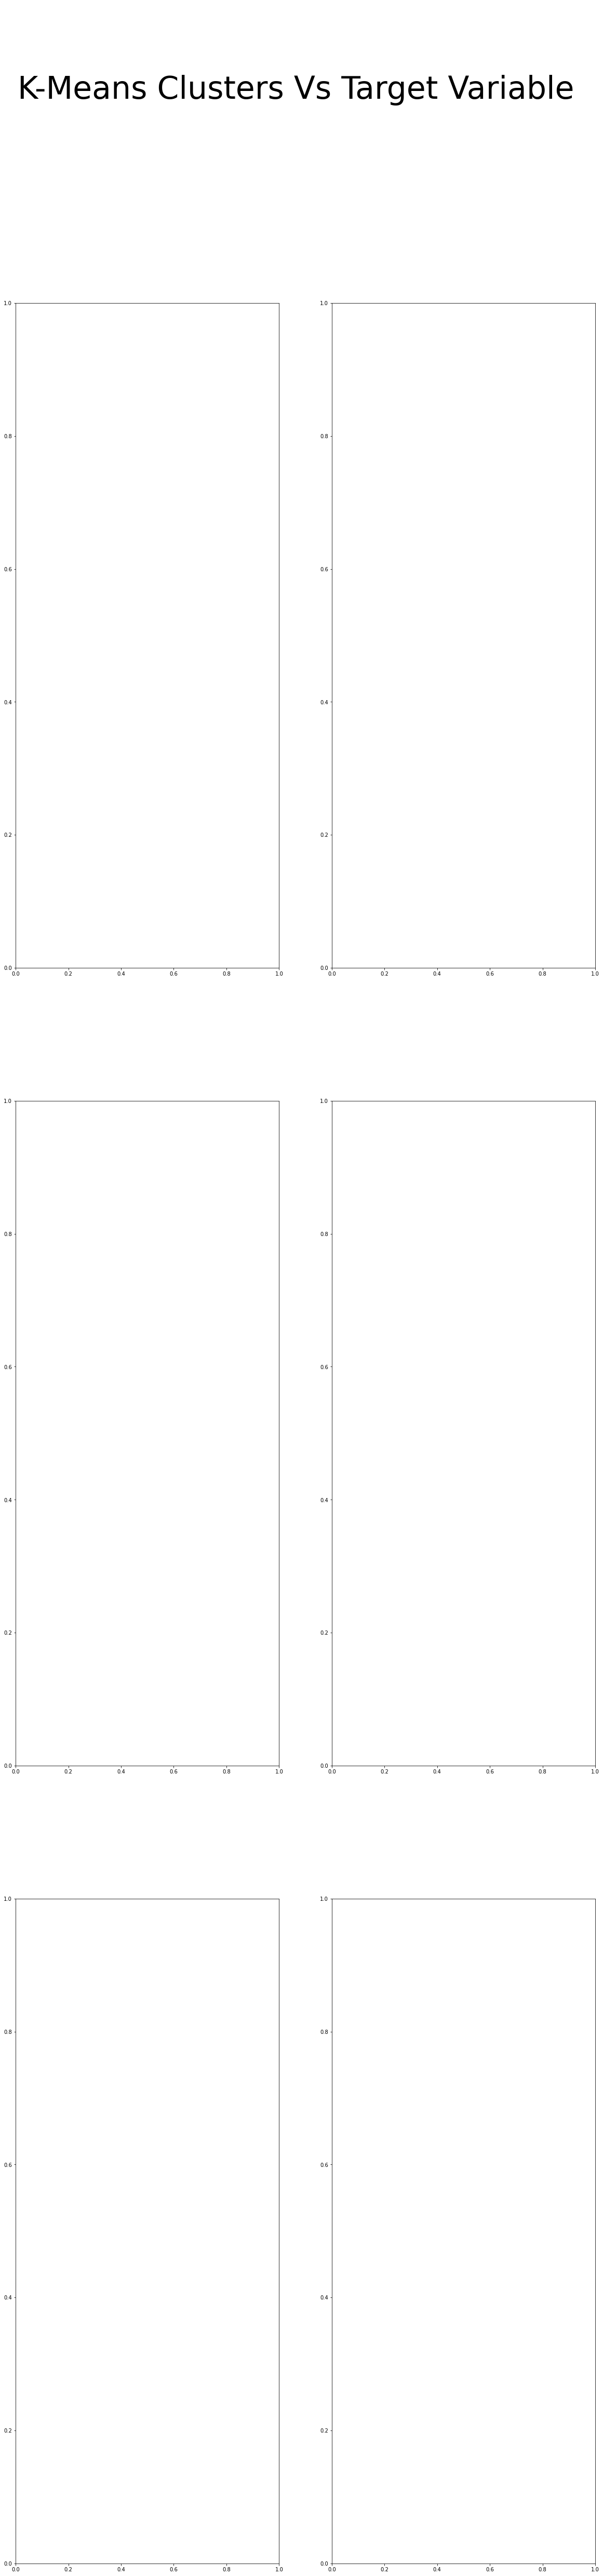

In [102]:
n_rows, n_cols = (3,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nK-Means Clusters Vs Target Variable', fontsize=60)

for index in range(6):
    
    i,j = (index // n_cols), (index % n_cols)
    
    model=KMeans(n_clusters=index+2)
    
    model.fit(scaled_data)
    cluster_labels=model.predict(scaled_data)
    
    sns.heatmap(pd.crosstab(cluster_labels,Y),
                ax=axes[i,j],
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
    
    axes[i,j].set_xlabel("Chronic Kidney Disease",fontsize=30)

    axes[i,j].set_ylabel("Cluster Labels",fontsize=30)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=20)
    
    axes[i,j].set_xticklabels(["No","Yes"],fontsize=20)
plt.show()

K-Means with Dimensionality Reduction

In [103]:
from sklearn.manifold import TSNE

In [ ]:
tsne_model = TSNE()
tsne_data= tsne_model.fit_transform(full_scaled_data)
xs=tsne_data[:,0]
ys=tsne_data[:,1]
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,c=pd.get_dummies(onehotdata['Chronic Kidney Disease: yes'],drop_first=True).values,cmap="winter")
plt.title("T-SNE\nTarget Variable Included")
plt.show()

In [ ]:
tsne_data= tsne_model.fit_transform(scaled_data)
xs=tsne_data[:,0]
ys=tsne_data[:,1]
plt.figure(figsize=(15,10))
plt.scatter(xs,ys,c=pd.get_dummies(Y,drop_first=True).values,cmap="winter")
plt.title("T-SNE\nTarget Variable Excluded")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

In [107]:
pca_features=list(range(1,25)) 

In [ ]:
ax=plt.figure(figsize=(15,7.5))
sns.barplot(pca_features, pca.explained_variance_,palette="winter_r")
plt.ylabel('Variation',fontsize=20)
plt.xlabel('PCA Components',fontsize=20)
plt.title("PCA Components\nRanked by Variation")
plt.show()

In [ ]:
pca1=PCA(n_components=1)
pca1_data=pca1.fit_transform(scaled_data)
plt.figure(figsize=(15,10))
pca1_data=pca1_data.reshape((400,))
bp=sns.boxenplot(y=pca1_data, x=data['Chronic Kidney Disease'], color="paleturquoise",showfliers=True)
plt.title("Separation of Categories\nUsing the main PCA Component")
plt.show()

In [ ]:
pca2=PCA(n_components=2)
pca2_data=pca2.fit_transform(scaled_data)
plt.figure(figsize=(15,5))
plt.scatter(pca2_data[:,0],pca2_data[:,1],c=onehotdata["Chronic Kidney Disease: yes"],cmap="winter_r")
plt.title('Two PCA Components')
plt.show()


In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(pca2_data[:,0],pca2_data[:,1],c=onehotdata["Chronic Kidney Disease: yes"],cmap="winter_r")
plt.xlim(right=-1.5,left=-3)
plt.ylim(bottom=-2.5,top=2)
plt.title("Zooming in on that mixed area")
plt.show()

In [ ]:
n_rows, n_cols = (12,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nPCA + T-SNE', fontsize=80)

for index in range(24):
    
    i,j = (index // n_cols), (index % n_cols)
    
    pca = PCA(n_components=index+1)
    pca_data=pca.fit_transform(scaled_data)
    tsne_data= tsne_model.fit_transform(pca_data)
    xs=tsne_data[:,0]
    ys=tsne_data[:,1]
    sns.scatterplot(xs,ys,c=pd.get_dummies(Y,drop_first=True).values,cmap="winter_r",ax=axes[i,j])
    axes[i,j].set_title("T-SNE with {} PCA Components".format(index+1))
axes[0,0].set_title("T-SNE with 1 PCA Component")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size=0.4, random_state=12)

In [ ]:
n_rows, n_cols = (24,3)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))

figure.suptitle('\n\nPCA + K-Means VS Target Variable\n', fontsize=80)

for index in range(72):
    
    i,j = (index // n_cols), (index % n_cols)
    
    pca = PCA(n_components=i+1)
    
    pca_data=pca.fit_transform(X_train)
    model=KMeans(n_clusters=j+4, random_state=5) #random_state is arbitrary,
                                                    #I just fixed it to make sure I always get the same results
    
    model.fit(pca_data)
    
    cluster_labels=model.predict(pca_data)
    
    sns.heatmap(pd.crosstab(Y_train,cluster_labels),
                ax=axes[i,j],
                cmap='Greens',
                square='True',
                cbar=False,  annot=True,
                annot_kws={'fontsize':18},
                fmt='d')
    
    axes[i,j].set_title("{} PCA components and {} clusters".format(i+1,j+4),fontsize=15)
    
    axes[i,j].set_ylabel("Chronic Kidney Disease",fontsize=15)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),fontsize=10)
    
    axes[i,j].set_yticklabels(["No","Yes"],fontsize=10)

In [ ]:
pca = PCA(n_components=1)
    
pca_training_data=pca.fit_transform(X_train)

model=KMeans(n_clusters=6, random_state=5)
    
model.fit(pca_training_data)

pca_testing_data=pca.transform(X_test)

cluster_labels=model.predict(pca_testing_data)

sns.heatmap(pd.crosstab(Y_test,cluster_labels),
                cmap='Greens',square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':20},
                fmt='d')

plt.title("Results on Testing Data",fontsize=25)
plt.ylabel("Chronic Kidney Disease",fontsize=10)
plt.xlabel("Cluster labels",fontsize=10)
plt.show()

In [ ]:
n_rows, n_cols= 12,2

figure, axes = plt.subplots(nrows=n_rows,ncols= n_cols, figsize=(30, 120))

figure.suptitle('\nLDA with Linear SVC\n(Distributions represent\nonly the training data)', fontsize=60)

for index in range(24):
    
    i,j = (index // n_cols), (index % n_cols)
    
    pca=PCA(n_components=index+1)
    
    lda=LinearDiscriminantAnalysis()
    some_pipe=make_pipeline(pca,lda)
    
    X_lda_train=some_pipe.fit_transform(X_train,Y_train)
    
    X_lda_test=some_pipe.fit_transform(X_test,Y_test)
    
    lin_svc.fit(X_lda_train,Y_train)
    
    y_pred_train=lin_svc.predict(X_lda_train)
    
    train_acc= accuracy_score(y_pred_train,Y_train)
    
    y_pred_test=lin_svc.predict(X_lda_test)
    
    test_acc= accuracy_score(y_pred_test,Y_test)X_lda_train=X_lda_train.reshape((240,))
    
    bp=sns.boxenplot(y=X_lda_train, x=Y_train, color="paleturquoise",showfliers=True,ax=axes[i,j])
    
    axes[i,j].set_title("n° Of PCA Components: {}\nTraining Accuracy: {}\nTesting Accuracy: {}".format(index+1,
                                                                                                       "%.3f"%train_acc,
                                                                                                       "%.3f"%test_acc))
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_xticklabels(["CKD","No CKD"])plt.show()

# **Evaluating A Few Other Models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
SVM_RBF=SVC()
    
SVM_Poly2=SVC(kernel='poly',degree=2)
    
SVM_Poly3=SVC(kernel='poly',degree=3)

KNN3=KNeighborsClassifier(n_neighbors=3,weights='distance')

KNN8=KNeighborsClassifier(n_neighbors=8,weights='distance')

KNN15=KNeighborsClassifier(n_neighbors=15,weights='distance')

Naive_Bayes=GaussianNB()

LogReg=LogisticRegression()

Tree=DecisionTreeClassifier()Forest=RandomForestClassifier()

models=[SVM_RBF,SVM_Poly2,SVM_Poly3,KNN3,KNN8,KNN15,Naive_Bayes,LogReg,Tree,Forest]

names=["SVM_RBF","SVM_Poly2","SVM_Poly3","Weighted 3NearestNeighbors","Weighted 8NearestNeighbors",
       "Weighted 15NearestNeighbors","Naive Bayes","Logistic Regression","Decision Tree","Random Forest"]

In [ ]:
n_rows, n_cols= 10,1

figure, axes = plt.subplots(nrows=n_rows,ncols= n_cols, figsize=(30, 120))

figure.suptitle('\nEvaluating Different Models', fontsize=120)



tr_mask = np.empty(shape=(24,1),dtype="object")
    
ts_mask = np.empty(shape=(24,1),dtype="object")

for i in range(24):
    tr_mask[i]="Training"ts_mask[i]="Testing"

mask = np.vstack((tr_mask,ts_mask))

mask=mask.reshape((48,))

cmps=[i for i in range(1,25)] * 2


for index in range(10):
    
    pca_tr_acc=[]
    
    pca_ts_acc=[]
    
    
    for n_comps in range(1,25):model=models[index]
        
        pca=PCA(n_components=n_comps)
        
        pca_model=make_pipeline(pca,model)
        
        pca_model.fit(X_train,Y_train)
        
        y_tr_pred= pca_model.predict(X_train)
        
        pca_tr_acc.append(accuracy_score(y_tr_pred,Y_train))
        
        y_ts_pred=pca_model.predict(X_test)
        
        pca_ts_acc.append(accuracy_score(y_ts_pred,Y_test))model_data = pd.DataFrame()
    
    model_data["PCA"] = pca_tr_acc + pca_ts_acc
        
    model_data["Results"] = mask
    
    sns.barplot(x=cmps, y="PCA", hue="Results", data=model_data, palette='cool', ax=axes[index]).set(ylim=(0.8,1))
    
    axes[index].set_title(names[index],fontsize=40)
    
    axes[index].set_xlabel("n° of PCA Components",fontsize=15)
    
    axes[index].set_ylabel("Accuracy",fontsize=35)
    
    axes[index].set_xticklabels(axes[index].get_xticklabels(),fontsize=15)
    
    
plt.show()
        

**Neural Networks**

In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
early_stopping_monitor = EarlyStopping(patience=5, monitor='accuracy')
Y_net = to_categorical(Y)
pca_tr_acc_1=[]
    
pca_ts_acc_1=[]

pca_tr_acc_2=[]
    
pca_ts_acc_2=[]


for i in range(1,25):
    
    pca=PCA(n_components=i)
    
    X_pca=pca.fit_transform(scaled_data)
    
    X_pca_train, X_pca_test, Y_train, Y_test = train_test_split(X_pca, Y_net, test_size=0.25, random_state=12)
    
    #little net
    net1= Sequential()net1.add(Dense(4, activation='relu', input_shape = (i,)))
    
    net1.add(Dense(2, activation='softmax'))
    
    net1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    net1.fit(X_pca_train, Y_train, epochs=50, callbacks=[early_stopping_monitor], verbose=0)
    
    y_tr_pred=net1.predict(X_pca_train)
    
    pca_tr_acc_1.append(accuracy_score(np.argmax(y_tr_pred, axis=1),Y_train[:,1]))
    
    y_ts_pred=net1.predict(X_pca_test)
    pca_ts_acc_1.append(accuracy_score(np.argmax(y_ts_pred, axis=1),Y_test[:,1]))
    
    
    
    #big net
    net2= Sequential()
    
    net2.add(Dense(50, activation='relu', input_shape = (i,)))
    
    net2.add(Dense(30, activation='relu'))
    
    net2.add(Dense(20, activation='relu'))
    
    net2.add(Dense(10, activation='relu'))
    
    net2.add(Dense(2, activation='softmax'))net2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    net2.fit(X_pca_train, Y_train, epochs=100, callbacks=[early_stopping_monitor], verbose=0)
    
    y_tr_pred=net2.predict(X_pca_train)
    
    pca_tr_acc_2.append(accuracy_score(np.argmax(y_tr_pred, axis=1),Y_train[:,1]))
    
    y_ts_pred=net2.predict(X_pca_test)
    
    pca_ts_acc_2.append(accuracy_score(np.argmax(y_ts_pred, axis=1),Y_test[:,1]))

In [ ]:
tr_mask = np.empty(shape=(24,1),dtype="object")
    
ts_mask = np.empty(shape=(24,1),dtype="object")

for i in range(24):
    tr_mask[i]="Training"
    ts_mask[i]="Testing"

mask = np.vstack((tr_mask,ts_mask))

mask=mask.reshape((48,))

cmps=[i for i in range(1,25)] * 2


net1_data = pd.DataFrame()net1_data["PCA"] = pca_tr_acc_1 + pca_ts_acc_1

net1_data["Results"] = mask


net2_data = pd.DataFrame()
    
net2_data["PCA"] = pca_tr_acc_2 + pca_ts_acc_2

net2_data["Results"] = mask

In [ ]:
n_rows, n_cols= 1,2

figure, axes = plt.subplots(nrows=n_rows,ncols= n_cols, figsize=(30, 10))

figure.suptitle('Little NN vs Big(ger) NN', fontsize=40)



graph1=sns.barplot(x=cmps, y="PCA", hue="Results", data=net1_data, palette='cool', ax=axes[0]).set(ylim=(0.5,1))

axes[0].set_title("Little Neural Network",fontsize=30)

axes[0].set_xlabel("n° of PCA Components",fontsize=25)

axes[0].set_ylabel("Accuracy",fontsize=25)axes[0].set_xticklabels(axes[0].get_xticklabels(),fontsize=15)



graph2=sns.barplot(x=cmps, y="PCA", hue="Results", data=net2_data, palette='cool', ax=axes[1]).set(ylim=(0.5,1))

axes[1].set_title("Big(ger) Neural Network",fontsize=30)

axes[1].set_xlabel("n° of PCA Components",fontsize=25)

axes[1].set_ylabel("Accuracy",fontsize=25)

axes[1].set_xticklabels(axes[1].get_xticklabels(),fontsize=15)
plt.show()

Final Thoughts and Self-Criticism